In [1]:
import pandas as pd
import networkx as nx
import json
from itertools import combinations

In [2]:
#read the json file
with open('osgoode_faculty_bios.json') as f:
    data = json.load(f)

In [3]:
for prof in data:
    prof['keyword_list'] = [keyword.strip().replace('.','') for keyword in prof['keywords'].split(';')]

profs = {}
for prof in data:
    profs[prof['name']] = prof['keyword_list']


In [4]:
G = nx.Graph()

In [5]:
for name, keywords in profs.items():
    G.add_node(name, keywords=keywords)

In [6]:
for name1, keywords1 in profs.items():
    for name2, keywords2 in profs.items():
        if name1 != name2:
            shared_keywords = set(keywords1) & set(keywords2)
            similarity_score = len(shared_keywords)
            if similarity_score >= 1: # set a threshold for adding edges
                G.add_edge(name1, name2, weight=similarity_score)

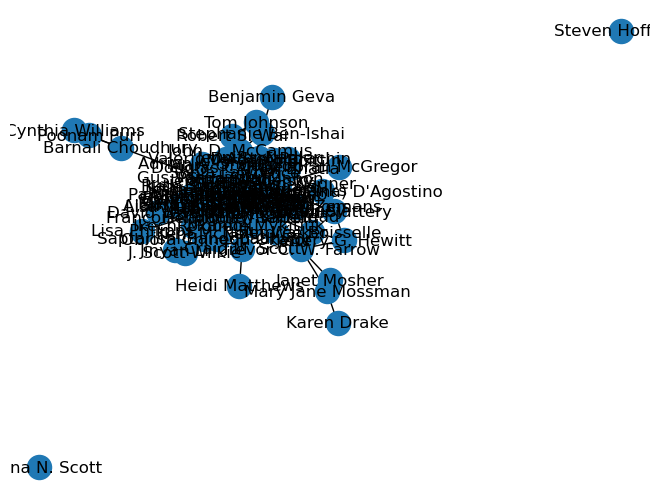

In [7]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)

In [8]:
import matplotlib.pyplot as plt
print(len(keywords))

7


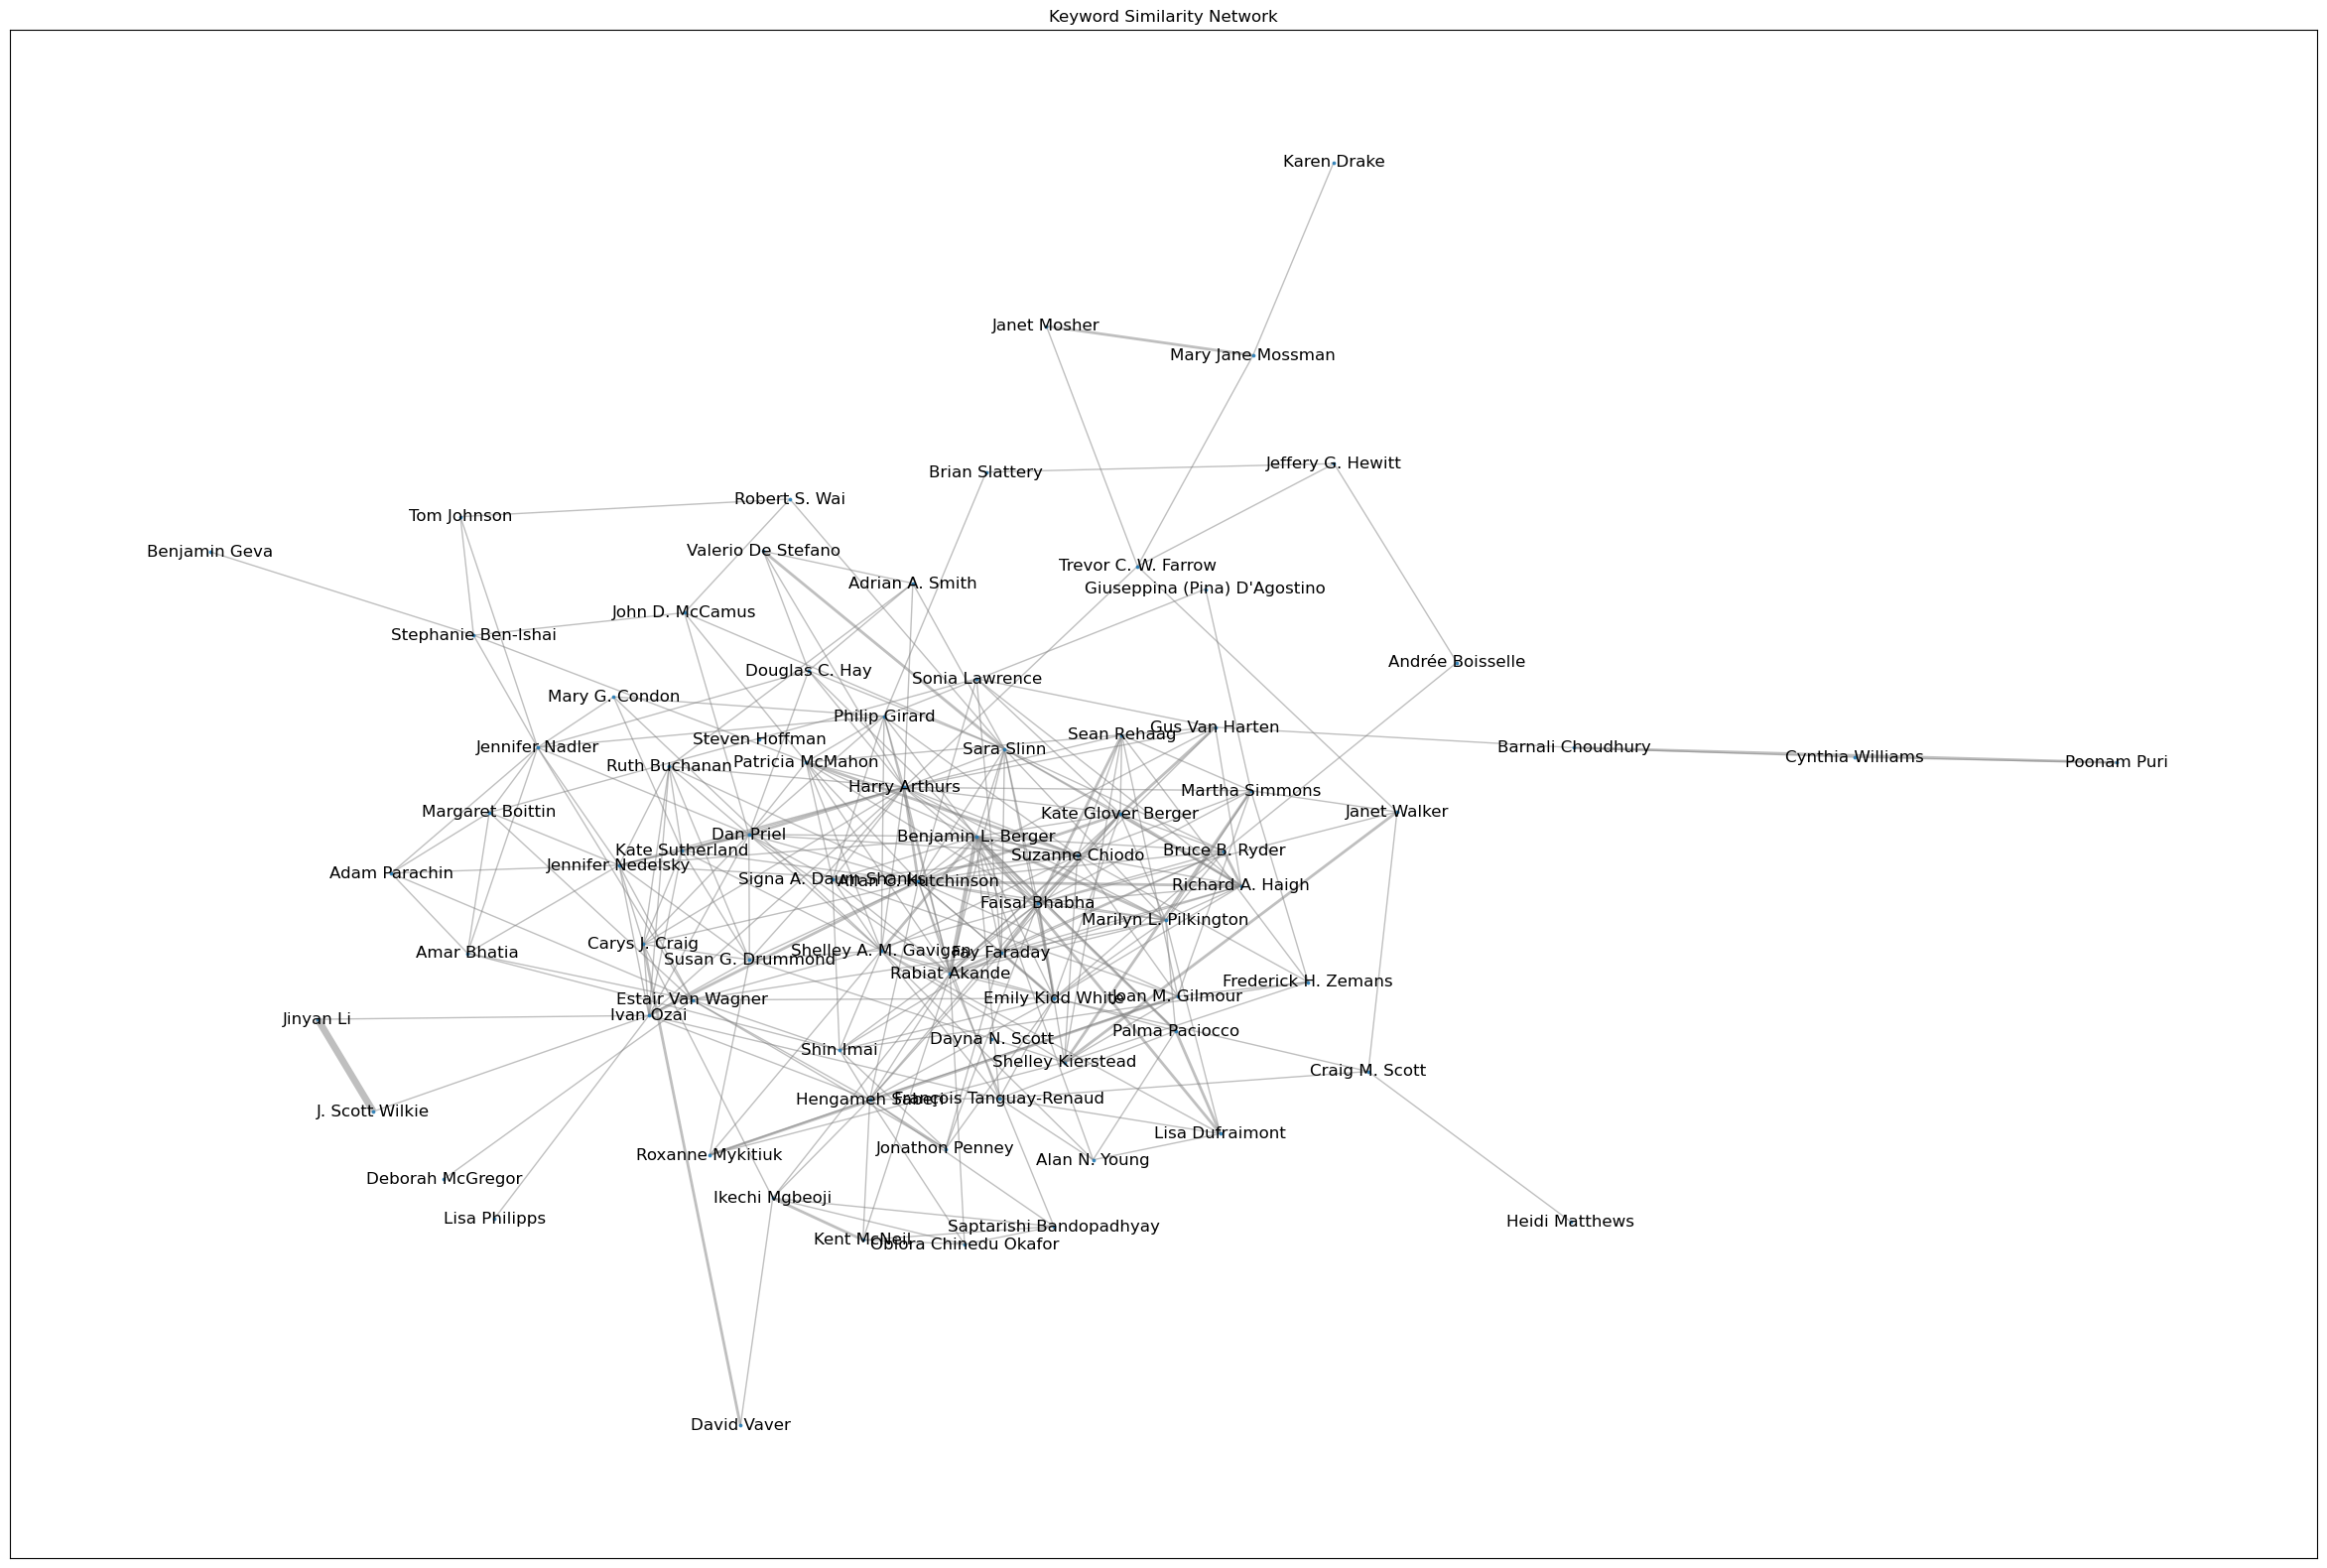

In [9]:
fig, ax = plt.subplots(figsize=(30, 20))

# customize node sizes and font sizes
node_size = 3
font_size = 12

# visualize the network
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=node_size, alpha=0.8)
nx.draw_networkx_labels(G, pos=pos, font_size=font_size)
nx.draw_networkx_edges(G, pos=pos, edge_color='gray', alpha=0.5, width=[d['weight'] for (u, v, d) in G.edges(data=True)])

# set the plot title and axis labels
plt.title('Keyword Similarity Network')

# show the plot
plt.show()

In [10]:
#make a list of each prof and their degree
#this will show how many keyword connections each person has with another person
prof_degrees = []
for prof in G.nodes():
    prof_degrees.append((prof, G.degree(prof)))
prof_degrees.sort(key=lambda x: x[1], reverse=True)
prof_degrees

[('Harry Arthurs', 26),
 ('Allan C. Hutchinson', 26),
 ('Rabiat Akande', 22),
 ('Benjamin L. Berger', 22),
 ('Faisal Bhabha', 21),
 ('Shelley A. M. Gavigan', 18),
 ('Dan Priel', 18),
 ('Hengameh Saberi', 16),
 ('Sara Slinn', 16),
 ('Emily Kidd White', 16),
 ('Fay Faraday', 15),
 ('Kate Glover Berger', 14),
 ('Suzanne Chiodo', 14),
 ('Jennifer Nedelsky', 14),
 ('Marilyn L. Pilkington', 14),
 ('Patricia McMahon', 13),
 ('Ivan Ozai', 13),
 ('Philip Girard', 12),
 ('Richard A. Haigh', 12),
 ('Estair Van Wagner', 12),
 ('Signa A. Daum Shanks', 11),
 ('Susan G. Drummond', 11),
 ('Jennifer Nadler', 11),
 ('Bruce B. Ryder', 11),
 ('Carys J. Craig', 10),
 ('Shin Imai', 10),
 ('Shelley Kierstead', 10),
 ('Sean Rehaag', 10),
 ('Martha Simmons', 10),
 ('Kate Sutherland', 10),
 ('François Tanguay-Renaud', 10),
 ('Ruth Buchanan', 9),
 ('Joan M. Gilmour', 9),
 ('Gus Van Harten', 8),
 ('Douglas C. Hay', 7),
 ('Ikechi Mgbeoji', 7),
 ('Palma Paciocco', 7),
 ('Amar Bhatia', 6),
 ('Margaret Boittin', 6),


In [11]:
#do a greedy modularity clustering
#this will group people together based on their keyword connections
#the higher the modularity score, the better the clustering
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)

In [12]:
print(f'There are {len(communities)} communities in the network.')

There are 9 communities in the network.


In [13]:
for i, community in enumerate(communities):
    print(f'Community {i + 1}:')
    for prof in community:
        print(prof, end=', ')
    print('\n---')
#this doesn't look like a very effective clustering to me.

Community 1:
Kate Sutherland, Douglas C. Hay, Sara Slinn, Jinyan Li, David Vaver, Jennifer Nedelsky, J. Scott Wilkie, Valerio De Stefano, Adrian A. Smith, Ruth Buchanan, Harry Arthurs, Allan C. Hutchinson, Ivan Ozai, Dan Priel, Susan G. Drummond, Carys J. Craig, Lisa Philipps, Ikechi Mgbeoji, 
---
Community 2:
Jennifer Nadler, Benjamin Geva, Stephanie Ben-Ishai, Shelley A. M. Gavigan, Lisa Dufraimont, Alan N. Young, Philip Girard, Benjamin L. Berger, Tom Johnson, François Tanguay-Renaud, Mary G. Condon, Suzanne Chiodo, Signa A. Daum Shanks, Patricia McMahon, John D. McCamus, Palma Paciocco, Robert S. Wai, 
---
Community 3:
Sonia Lawrence, Shin Imai, Adam Parachin, Faisal Bhabha, Richard A. Haigh, Margaret Boittin, Fay Faraday, Marilyn L. Pilkington, Bruce B. Ryder, Jonathon Penney, Emily Kidd White, Gus Van Harten, Kate Glover Berger, Amar Bhatia, Estair Van Wagner, Deborah McGregor, 
---
Community 4:
Shelley Kierstead, Heidi Matthews, Janet Walker, Martha Simmons, Joan M. Gilmour, Fre

In [14]:
from networkx.algorithms.community import louvain_communities
communities = louvain_communities(G, seed=42)
print(f'There are {len(communities)} communities in the network.')

There are 11 communities in the network.


In [15]:
for i, community in enumerate(communities):
    print(f'Community {i + 1}:')
    for prof in community:
        print(prof, end=', ')
    print('\n---')
#this looks quite a bit better than the greedy modularity clustering

Community 1:
Harry Arthurs, Kate Sutherland, Allan C. Hutchinson, David Vaver, Ivan Ozai, Jennifer Nedelsky, Dan Priel, Susan G. Drummond, Carys J. Craig, Lisa Philipps, Ruth Buchanan, 
---
Community 2:
Poonam Puri, Barnali Choudhury, Cynthia Williams, 
---
Community 3:
Lisa Dufraimont, Alan N. Young, Heidi Matthews, Benjamin L. Berger, Shelley A. M. Gavigan, François Tanguay-Renaud, Craig M. Scott, Palma Paciocco, 
---
Community 4:
Marilyn L. Pilkington, Sonia Lawrence, Shin Imai, Bruce B. Ryder, Jonathon Penney, Emily Kidd White, Faisal Bhabha, Richard A. Haigh, Gus Van Harten, Kate Glover Berger, Fay Faraday, 
---
Community 5:
Trevor C. W. Farrow, Jeffery G. Hewitt, Andrée Boisselle, Karen Drake, Brian Slattery, Mary Jane Mossman, Janet Mosher, 
---
Community 6:
Steven Hoffman, 
---
Community 7:
Shelley Kierstead, Philip Girard, Janet Walker, Martha Simmons, Joan M. Gilmour, Frederick H. Zemans, Sean Rehaag, Suzanne Chiodo, Roxanne Mykitiuk, Signa A. Daum Shanks, Mary G. Condon, Giu

In [16]:
colors = ["" for x in range(G.number_of_nodes())]
from random import randint
counter = 0
for com in communities:
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[counter] = color
        counter += 1

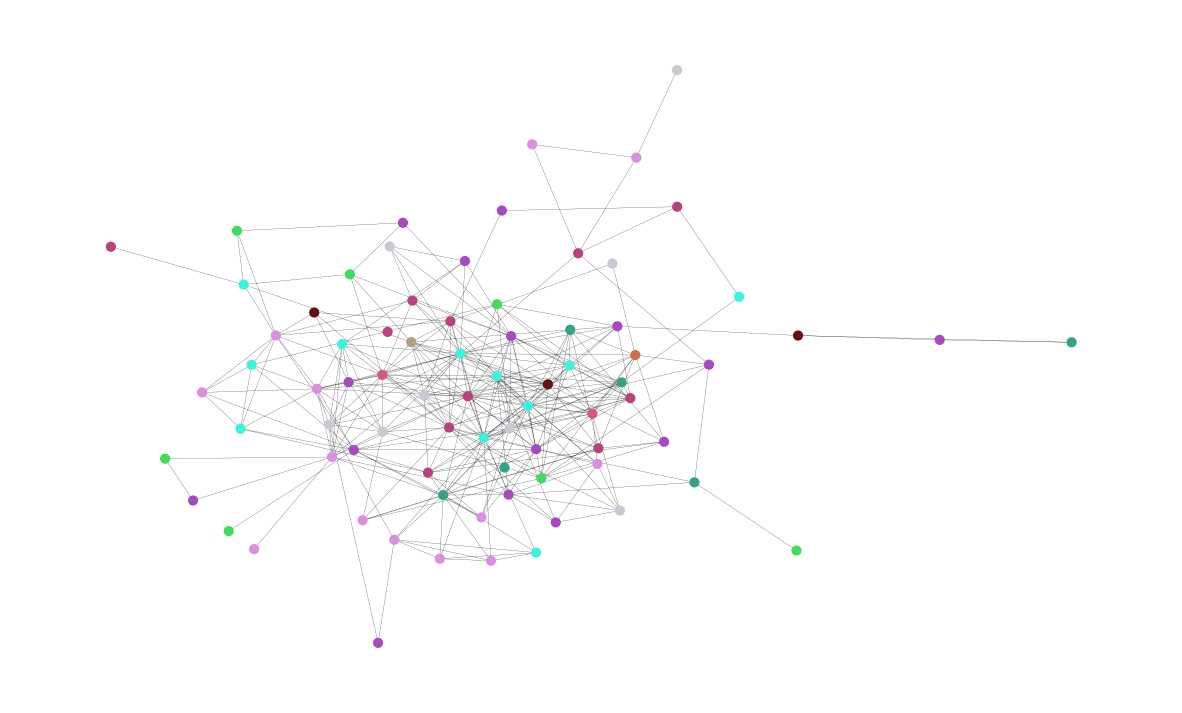

In [17]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=40, with_labels=False, width=0.15, node_color=colors
)

In [18]:
#let's try something different

In [19]:
df = pd.read_json('osgoode_faculty_bios.json')

In [20]:
keywords_edge_list = pd.DataFrame()

In [21]:
for idx,row in df.iterrows():
    ks = [keyword.strip().replace('.','') for keyword in row['keywords'].split(';')]
    keyword_pairs = list(combinations(ks, 2))
    temp_df = pd.DataFrame(keyword_pairs, columns=['Keyword 1', 'Keyword 2'])
    keywords_edge_list = pd.concat([keywords_edge_list, temp_df])
    
    


In [22]:
keywords_edge_list.reset_index(drop=True, inplace=True)
keywords_edge_list

,Keyword 1,Keyword 2
0,Legal History,Law and Religion
1,Legal History,Constitutional Law
2,Legal History,Islamic Law
3,Legal History,International Law
4,Legal History,Postcolonial African Law
...,...,...
1894,Canadian Legal Profession,Human Rights Commission
1895,Canadian Legal Profession,Mediator/Facilitator
1896,Quality Assurance of State-Funded Legal Services,Human Rights Commission
1897,Quality Assurance of State-Funded Legal Services,Mediator/Facilitator


In [23]:
G = nx.from_pandas_edgelist(keywords_edge_list, source='Keyword 1', target='Keyword 2', create_using=nx.Graph())

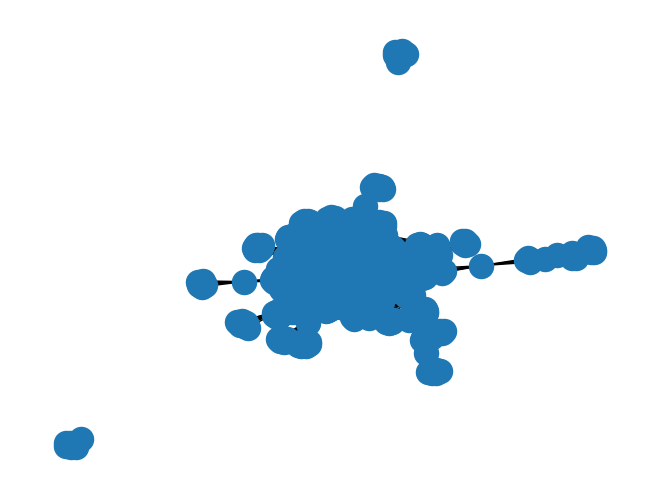

In [24]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=False)

In [25]:
communities = greedy_modularity_communities(G)
print(f'There are {len(communities)} communities in the network.')

There are 16 communities in the network.


In [26]:
for i, community in enumerate(communities):
    print(f'Community {i + 1}:')
    for keyword in community:
        print(keyword, end=', ')
    print('\n---')

Community 1:
Judicial Review, Procedural Fairness, Public Law, Equity, Senate Modernization, Social Justice and Political Activism, Constitutional and Public Law, RedLEIDH, Judiciary, Contract of Employment, Legal Profession, Civil Law, Globalization, Canadian Legal History, Criminal Law, Comparative History, Criminal Procedure, Administrative Law, Constitutional Studies, Emergency Law, Evidence, Public International Law, Humanities, Social Sciences, Labour Law, Punishment, Rule of Law, Discrimination Law, Migrant Workers, Equality and Anti-Discrimination, Constitutional Law, Social Justice, Childhood Sexual Abuse, Labour and Employment, Indigenous Rights, Human Rights, AI and the Law, Law Reform, Clinical Education, Legal Process, Kawaskimhon Aboriginal Rights Moot, Legal History, Plea Bargaining, Standard of Proof, Postcolonial African Law, Legal Ethics, Equality, Legal Theory, Legal Reasoning, Aboriginal Self-government, Torts, Public Policy Research Institutes, Law and Equity, Lega

In [27]:
communities = louvain_communities(G, seed=42)
print(f'There are {len(communities)} communities in the network.')

There are 17 communities in the network.


In [28]:
for i, community in enumerate(communities):
    print(f'Community {i + 1}:')
    for keyword in community:
        print(keyword, end=', ')
    print('\n---')

Community 1:
International Law, Human Rights Engagements, Trademark Law, Patents, International Human Rights, Users' Rights, Indigenous Peoples, Intellectual Property Policy, Trade Secrets, Public Domain, Disasters, Trade-marks, State Formation, United States, Patent Law, UN Reports, New Zealand, Environmental Law, Third World Approaches to International Law, Copyright Law, Australia, Human Displacement, Risk, Anthropology, Biotechnology, Nigerian Legal Studies, Rights, Order of Canada, Intellectual Property Law, Competition Policy, Copyright, Canada, Immigration/Refugee Law, Authorship, 
---
Community 2:
Gender, Equality, Immigration Law, Privacy/Surveillance, Maori Law, Environmental justice, Natural Resource Law, Feminist Judgments, Forced Labor, Land Use Systems, Aboriginal Title, Equality Law, Law & Society, Social Justice and Political Activism, Douglas J Sherbaniuk Distinguished Writing Award, Charity Law, Disinformation/Manipulation, Research Methods, Trust Law, Human Rights in

In [29]:
colors = ["" for x in range(G.number_of_nodes())]
from random import randint
counter = 0
for com in communities:
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[counter] = color
        counter += 1

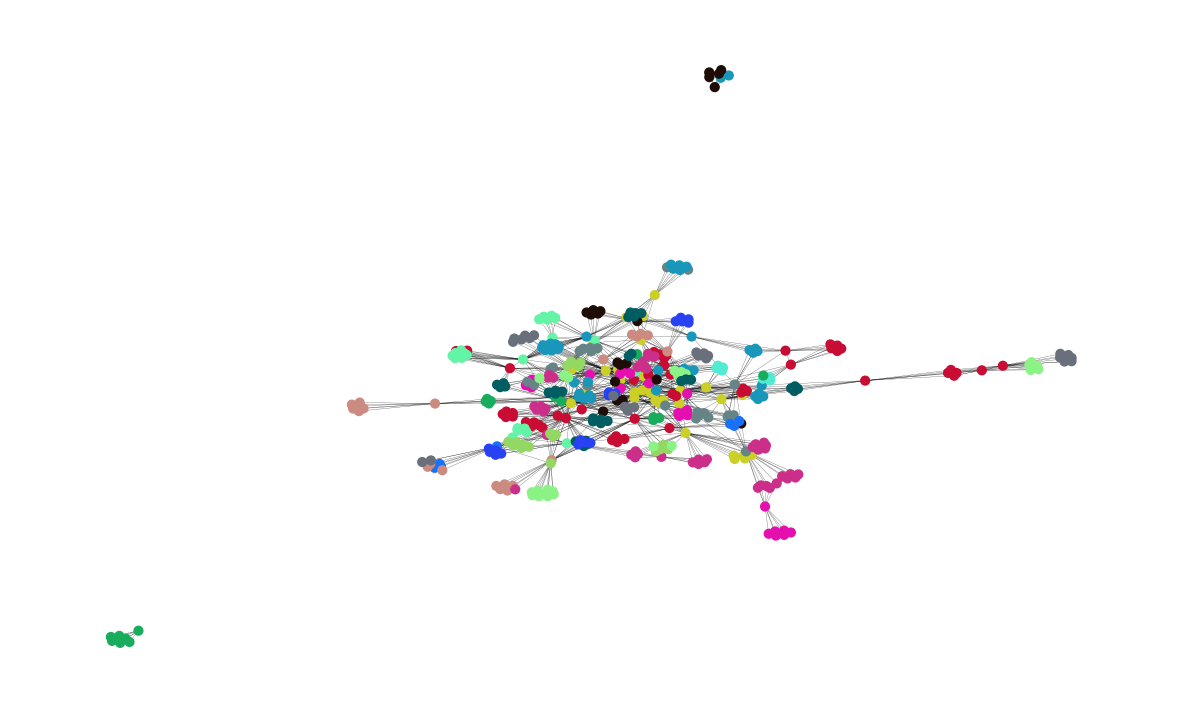

In [30]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=40, with_labels=False, width=0.15, node_color=colors
)

In [49]:
for i,com in enumerate(communities):
    print(f'Community {i + 1}:')
    profs_in_com = []
    for prof in data:
        keys = prof['keyword_list']
        for key in keys:
            if key in com:
                profs_in_com.append(prof['name'])
    print(set(profs_in_com))
    print('\n---')


Community 1:
{'Rabiat Akande', 'Saptarishi Bandopadhyay', 'Kent McNeil', 'David Vaver', 'Obiora Chinedu Okafor', 'Hengameh Saberi', 'Carys J. Craig', 'Ikechi Mgbeoji'}

---
Community 2:
{'Sonia Lawrence', 'Shin Imai', 'Jennifer Nadler', 'Adam Parachin', 'Emily Kidd White', 'Faisal Bhabha', 'Jennifer Nedelsky', 'Hengameh Saberi', 'Margaret Boittin', 'Jonathon Penney', 'Amar Bhatia', 'Fay Faraday', 'Estair Van Wagner', 'Deborah McGregor'}

---
Community 3:
{'Harry Arthurs', 'Kate Sutherland', 'Allan C. Hutchinson', 'Benjamin L. Berger', 'Ivan Ozai', 'Jennifer Nedelsky', 'Dan Priel', 'Susan G. Drummond', 'Adrian A. Smith', 'Carys J. Craig', 'Ruth Buchanan'}

---
Community 4:
{'Harry Arthurs', 'Rabiat Akande', 'Philip Girard', 'Jennifer Nadler', 'Benjamin L. Berger', 'Martha Simmons', 'Mary G. Condon', 'Suzanne Chiodo', 'Signa A. Daum Shanks', 'Dan Priel', "Giuseppina (Pina) D'Agostino", 'Brian Slattery', 'Patricia McMahon', 'Shelley A. M. Gavigan'}

---
Community 5:
{'Marilyn L. Pilkingto